In [1]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split 

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

In [3]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
211,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,0.1533,0.06057,...,24.99,85.22,546.3,0.12800,0.18800,0.147100,0.06913,0.2535,0.07993,1
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.038000,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.15470,0.22310,0.179100,0.11550,0.2382,0.08553,1
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,19.54,50.41,185.2,0.15840,0.12020,0.000000,0.00000,0.2932,0.09382,1
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,21.84,152.10,1535.0,0.11920,0.28400,0.402400,0.19660,0.2730,0.08666,0
360,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,...,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521,1


In [4]:
df.shape

(569, 31)

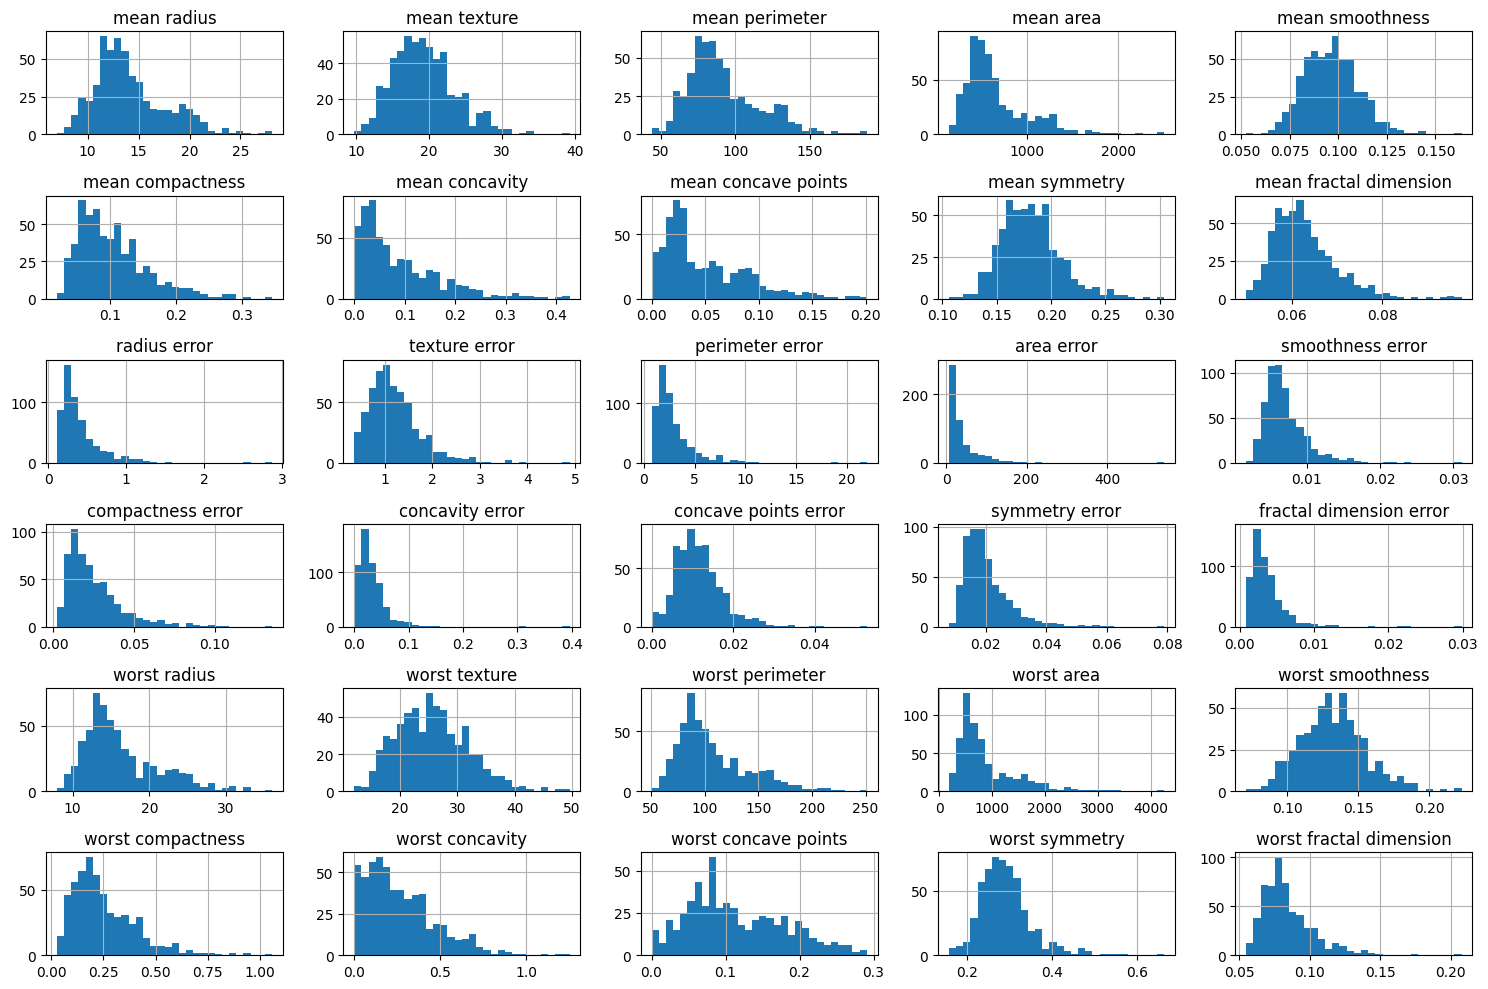

In [5]:
# Plot feature distributions (for a subset of features)
import matplotlib.pyplot as plt
df.drop('target', axis=1).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

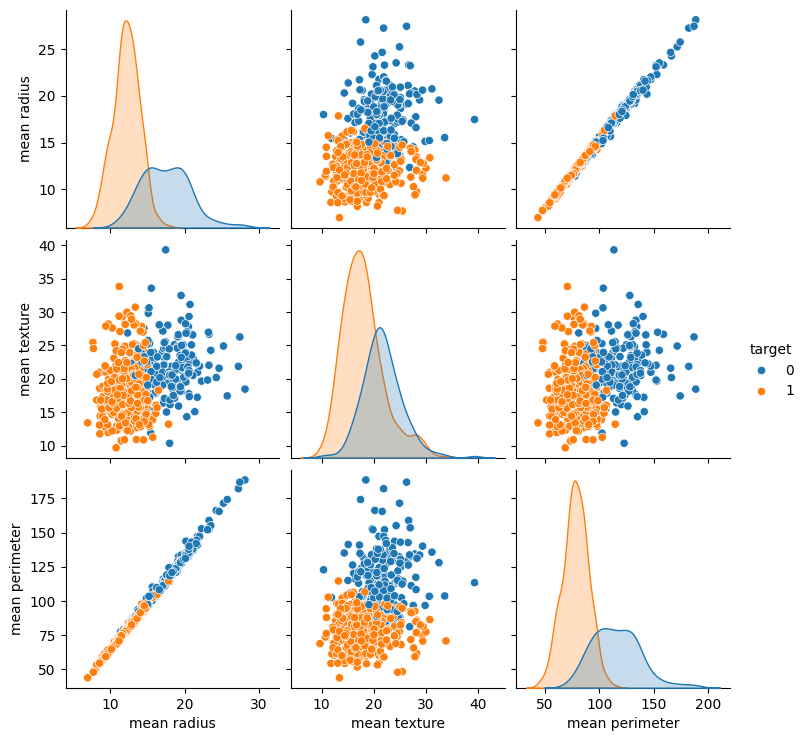

In [6]:
# Sample a few key features for pairplot
import seaborn as sns
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'target']], hue='target')
plt.show()

In [7]:
x, y = df.drop(columns= 'target'), df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(max_iter= 4000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print((precision_score(y_test, y_pred_lr)*100))
print(confusion_matrix(y_test, y_pred_lr))

print(cross_val_score(lr, x, y, cv=10).mean())

92.95774647887323
[[43  5]
 [ 0 66]]
0.9543233082706767


## Decission Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

print((precision_score(y_test, y_pred_dt)*100))
print(confusion_matrix(y_test, y_pred_dt))

print(cross_val_score(dt, x, y, cv=10).mean())

93.75
[[44  4]
 [ 6 60]]
0.9050751879699247


## knn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

print((precision_score(y_test, y_pred_knn)*100))
print(confusion_matrix(y_test, y_pred_knn))

print(cross_val_score(knn, x, y, cv=10).mean())

92.53731343283582
[[43  5]
 [ 4 62]]
0.9209273182957393


## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print((precision_score(y_test, y_pred_rf)*100))
print(confusion_matrix(y_test, y_pred_rf))

print(cross_val_score(rf, x, y, cv=10).mean())

95.45454545454545
[[45  3]
 [ 3 63]]
0.9578320802005011


# Voting Classifer(hard_voting)

In [12]:
from sklearn.ensemble import VotingClassifier

estimators = [('logistic_regression', lr), ('random_forest', rf), ('decission_tree', dt), ('knn', knn)]
vc = VotingClassifier(estimators=estimators, voting= 'hard')
vc.fit(x_train, y_train)
y_pred_vc = rf.predict(x_test)

print((precision_score(y_test, y_pred_vc)*100))
print(confusion_matrix(y_test, y_pred_vc))

print(cross_val_score(vc, x, y, cv=10).mean())

95.45454545454545
[[45  3]
 [ 3 63]]
0.9561090225563911


# Voting Classifer(soft_voting)

In [13]:
from sklearn.ensemble import VotingClassifier

estimators = [('logistic_regression', lr), ('random_forest', rf)]
vc = VotingClassifier(estimators=estimators, voting = 'soft')
vc.fit(x_train, y_train)
y_pred_vc = rf.predict(x_test)

print((precision_score(y_test, y_pred_vc)*100))
print(confusion_matrix(y_test, y_pred_vc))

print(cross_val_score(vc, x, y, cv=10).mean())

95.45454545454545
[[45  3]
 [ 3 63]]
0.9560776942355889


## voting on the basis of weights of each voting model

In [14]:
e = 0
for i in range(1, 3):
    for j in range(0, 3):
        vc_new = VotingClassifier(estimators= estimators, voting='hard', weights=[i, j])        
        print(f" {e+1}) for i ={i}, j ={j} = {(np.mean(cross_val_score(vc_new, x, y, cv = 10, scoring= 'accuracy')))*100:.2f}")
        e+=1

 1) for i =1, j =0 = 95.43
 2) for i =1, j =1 = 95.61
 3) for i =1, j =2 = 96.14
 4) for i =2, j =0 = 95.43
 5) for i =2, j =1 = 95.43
 6) for i =2, j =2 = 95.61


In [15]:
# from itertools import product
# # Generate all combinations of weights [1, 2, 3, 4]
# weight_combinations = product(range(1, 5), repeat=4)

# for i, j, k, l in weight_combinations:
#     vc_new = VotingClassifier(
#         estimators=estimators,
#         voting='hard',
#         weights=[i, j, k, l]
#     )
#     accuracy = np.mean(cross_val_score(vc_new, x, y, cv=10, scoring='accuracy'))
#     print(f'Accuracy for i={i}, j={j}, k={k}, l={l} = {accuracy:.4f}')